In [20]:
import pandas as pd
import numpy as np

# read in needed csv files
df = pd.read_csv('data/new_policy4.csv')
movies = pd.read_csv('data/movies_2428.csv')
ratings = pd.read_csv('data/ratings.csv')


df.head()

,Unnamed: 0,0
0,0,1206
1,1,825
2,2,1111
3,3,42
4,4,183


In [24]:
from utils.model_utils import set_up_ratings

# create easy to read dataframe of movie recomendations
ratings, movie_dict = set_up_ratings(ratings, min_move = 1000)
reverse_movie_dict = {v: k for k, v in movie_dict.items()}
original_movies = [reverse_movie_dict[item] for item in range(len(df))]
original_recs = [reverse_movie_dict[item] for item in df['0']]
data = {'movieID': original_movies, 'recomendation': original_recs}
rec_df = pd.DataFrame(data)
rec_df['movie name'] = rec_df.apply(lambda row: movies[movies['movieId']==row['movieID']]['title'].values[0], axis =1)
rec_df['recomendation name'] = rec_df.apply(lambda row: movies[movies['movieId']==row['recomendation']]['title'].values[0], axis =1)

rec_df['num_reviews'] = rec_df['movie name'].apply(lambda x: len(ratings[ratings['movieId']==x]))
rec_df['avg_rating'] = rec_df['movie name'].apply(lambda x: ratings[ratings['movieId']==x]['rating'].mean())

# print out recomendations for most reviewed movies
rec_df.sort_values('num_reviews', ascending= False).head(50)

,movieID,recomendation,movie name,recomendation name,num_reviews,avg_rating
0,0,1206,Toy Story (1995),Toy Story 2 (1999),0,NaN
1613,1613,1210,"Tuxedo, The (2002)","Last Picture Show, The (1971)",0,NaN
1615,1615,850,Bowling for Columbine (2002),Roger & Me (1989),0,NaN
1616,1616,1165,Punch-Drunk Love (2002),Being John Malkovich (1999),0,NaN
1617,1617,1817,"Ring, The (2002)",Saw (2004),0,NaN
1618,1618,1641,Grave of the Fireflies (Hotaru no haka) (1988),My Neighbor Totoro (Tonari no Totoro) (1988),0,NaN
1619,1619,378,Saturday Night Fever (1977),Singin' in the Rain (1952),0,NaN
1620,1620,385,"Professional, The (Le professionnel) (1981)",North by Northwest (1959),0,NaN
1621,1621,1656,Jackass: The Movie (2002),Old School (2003),0,NaN
1622,1622,1644,Frida (2002),"Hours, The (2002)",0,NaN


In [28]:
from pyvis.network import Network

# creating graph network of all recomendations

# Create the network
net = Network(height="750px", width="100%", bgcolor='#222222', font_color='white')
net.barnes_hut()

# Add nodes
for _, row in rec_df.iterrows():
    net.add_node(str(row['movie name']), label=str(row['movie name']))
#, size=int(row['num_reviews'])
# Add edges
for _, row in rec_df.iterrows():
    if row['recomendation name'] not in net.nodes:
        net.add_node(str(row['recomendation name']), label=str(row['recomendation name']))
    net.add_edge(str(row['movie name']), str(row['recomendation name']))

# uncomment line below to save the graph to an html file
# net.write_html('movie_connections.html')

In [32]:
# find movies with most recomendations
most_recs = rec_df.groupby('recomendation name').count()

print("Top 20 recommended movies")
most_recs.sort_values('num_reviews', ascending=False).head(20)['num_reviews']


Top 20 recommended movies


recomendation name
Shawshank Redemption, The (1994)    17
Mary Poppins (1964)                 16
Godfather, The (1972)               13
My Fair Lady (1964)                 13
Happy Gilmore (1996)                12
Sense and Sensibility (1995)        11
This Is Spinal Tap (1984)           10
Boot, Das (Boat, The) (1981)        10
Young Frankenstein (1974)            9
Hoop Dreams (1994)                   9
50 First Dates (2004)                9
Stop Making Sense (1984)             9
Speed (1994)                         9
Alien (1979)                         8
When Harry Met Sally... (1989)       8
While You Were Sleeping (1995)       8
Fargo (1996)                         8
Dark Knight, The (2008)              8
American President, The (1995)       8
Rear Window (1954)                   8
Name: num_reviews, dtype: int64

Text(0.5, 1.0, 'Average Reward per Time Step over Episodes')

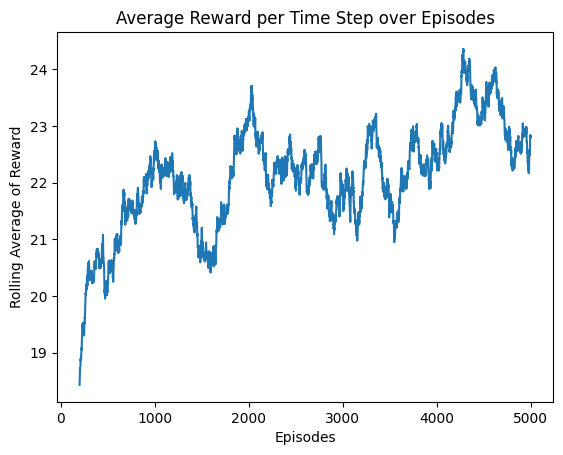

In [36]:
# plot average reward per timestep over episode  (smoothed)
import matplotlib.pyplot as plt
rewards = pd.read_csv('data/rewards4.csv')

rolling_avg = rewards['0'].rolling(window=200).mean()  
plt.plot(rolling_avg)
plt.xlabel('Episodes')
plt.ylabel('Rolling Average of Reward')
plt.title('Average Reward per Time Step over Episodes')

Text(0.5, 1.0, 'Number of Timesteps per Epsisode over Episodes')

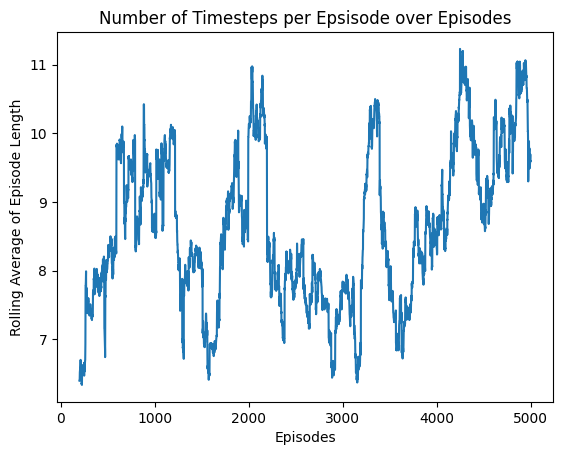

In [37]:
# plot average reward per timestep over episode  (smoothed)
rewards = pd.read_csv('data/steps4.csv')

rolling_avg = rewards['0'].rolling(window=200).mean()  
plt.plot(rolling_avg)
plt.xlabel('Episodes')
plt.ylabel('Rolling Average of Episode Length')
plt.title('Number of Timesteps per Epsisode over Episodes')